Análisis exploratorio de datos
Vence el 5 de abril de 2025 23:59
Instrucciones


ta Esta actividad tiene como objetivo en Realizar un análisis exploratorio sobre los datos disponibles en: https://archive.ics.uci.edu/dataset/320/student+performance 

 

Para esta tarea tenga en cuenta lo siguiente: 

 

Realice el análisis descriptivo sobre algunas de las variables del conjunto de datos. Seleccione al menos una numérica, una nominal y una ordinal. 
Para realizar el análisis exploratorio formule al menos 7 preguntas que pueda considerar de interés de acuerdo con la naturaleza de los datos. Dentro de las preguntas formuladas se debe encontrar la comparación entre variables de tipo: numérica-numérica, numérica-categórica y categórica-categórica. 
Recuerde que en cada caso se debe presentar un gráfico y una tabla o un estadístico que complemente la información. Todos los gráficos y tablas deben contar con la información necesaria para su implementación(etiquetas en ellos ejes, títulos etc.) 
 
2    El reporte de los resultados obtenidos en el punto anterior debe presentarse en un documento considerando la siguiente estructuras: 

Background: Un párrafo describiendo el contexto y el fenómeno de estudio 
Descripción de los datos: describir las características principales del conjunto de datos utilizado, resultado las variables utilizadas durante el proceso de análisis 
Análisis: descripción de los métodos utilizados y los resultados encontrados. análisis descriptivo exploratorios obligatorios. El análisis Inferencial es opcional.  
Resultados y conclusiones: Presentar un párrafo que describa los hallazgos obtenidos de forma general

In [28]:
pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [29]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
student_performance = fetch_ucirepo(id=320) 
  
# data (as pandas dataframes) 
X = student_performance.data.features 
y = student_performance.data.targets 
  
# metadata 
print(student_performance.metadata) 
  
# variable information 
print(student_performance.variables) 




{'uci_id': 320, 'name': 'Student Performance', 'repository_url': 'https://archive.ics.uci.edu/dataset/320/student+performance', 'data_url': 'https://archive.ics.uci.edu/static/public/320/data.csv', 'abstract': 'Predict student performance in secondary education (high school). ', 'area': 'Social Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 649, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': ['Sex', 'Age', 'Other', 'Education Level', 'Occupation'], 'target_col': ['G1', 'G2', 'G3'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5TG7T', 'creators': ['Paulo Cortez'], 'intro_paper': {'ID': 360, 'type': 'NATIVE', 'title': 'Using data mining to predict secondary school student performance', 'authors': 'P. Cortez, A. M. G. Silva', 'venue': 'Proceedings of 5th Annual Future Business Technolo

In [30]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from scipy import stats

In [31]:
# Configuramos el estilo de los gráficos
plt.style.use('seaborn-v0_8')

# Descargamos el conjunto de datos
student_performance = fetch_ucirepo(id=320)

# Extraemos los datos
X = student_performance.data.features
y = student_performance.data.targets

# Combinamos características y objetivos para un conjunto de datos completo
df = pd.concat([X, y], axis=1)

# Mostramos las dimensiones del dataset
print("Dimensiones del dataset:", df.shape)

# Mostramos las primeras 5 filas
print("\nPrimeras 5 filas:")
print(df.head())

Dimensiones del dataset: (649, 33)

Primeras 5 filas:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]


In [32]:
# Comprobamos los tipos de datos y valores faltantes
print("\nTipos de datos:")
print(df.dtypes)
print("\nValores faltantes:")
print(df.isnull().sum())


Tipos de datos:
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

Valores faltantes:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0



1. Análisis estadístico de la nota final (G3):
count    649.000000
mean      11.906009
std        3.230656
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64


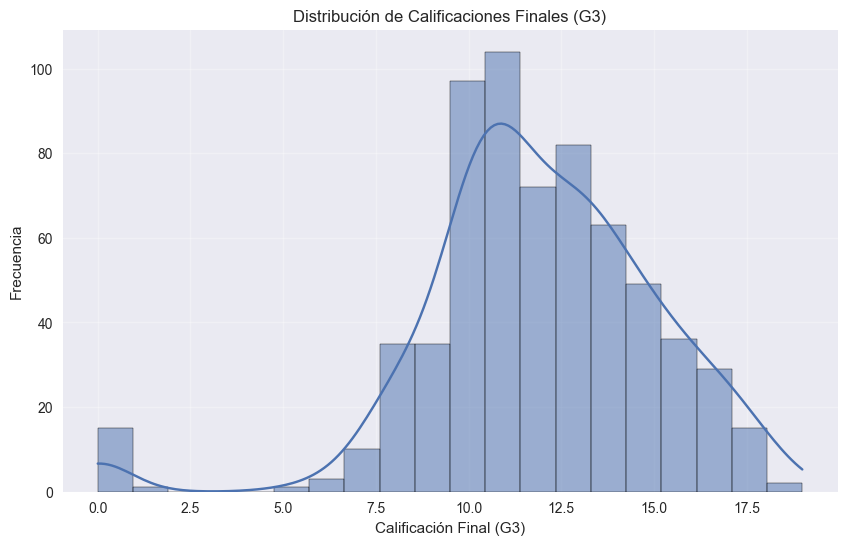

In [33]:
# ANÁLISIS DE VARIABLES G3 (NOTA FINAL), sex (género) y age (edad)
# -----------------------------------

# 1. Análisis de variable numérica: G3 (nota final)
print("\n1. Análisis estadístico de la nota final (G3):")
g3_stats = df['G3'].describe()
print(g3_stats)

# Histograma de G3
plt.figure(figsize=(10, 6))
sns.histplot(df['G3'], kde=True, bins=20)
plt.title('Distribución de Calificaciones Finales (G3)')
plt.xlabel('Calificación Final (G3)')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)
plt.show()


2. Análisis de la distribución por género:
sex
F    383
M    266
Name: count, dtype: int64

Porcentaje:
sex
F    59.013867
M    40.986133
Name: proportion, dtype: float64


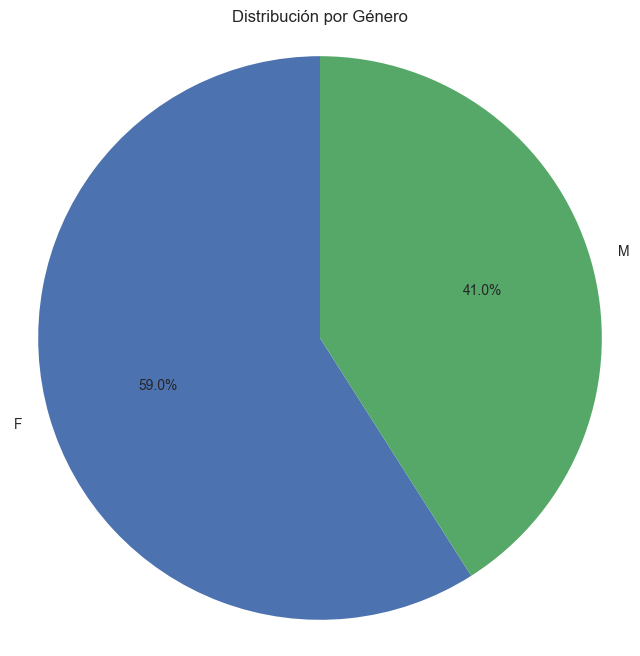

In [34]:
# 2. Análisis de variable nominal: sexo
print("\n2. Análisis de la distribución por género:")
gender_counts = df['sex'].value_counts()
print(gender_counts)
gender_percentage = df['sex'].value_counts(normalize=True) * 100
print("\nPorcentaje:")
print(gender_percentage)

# Gráfico de torta para la distribución de género
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución por Género')
plt.axis('equal')
plt.show()

In [35]:
# 3. Análisis de variable ordinal: tiempo de estudio
print("\n3. Análisis del tiempo de estudio semanal:")
studytime_counts = df['studytime'].value_counts().sort_index()
print(studytime_counts)
studytime_percentage = df['studytime'].value_counts(normalize=True).sort_index() * 100
print("\nPorcentaje:")
print(studytime_percentage)


3. Análisis del tiempo de estudio semanal:
studytime
1    212
2    305
3     97
4     35
Name: count, dtype: int64

Porcentaje:
studytime
1    32.665639
2    46.995378
3    14.946071
4     5.392912
Name: proportion, dtype: float64


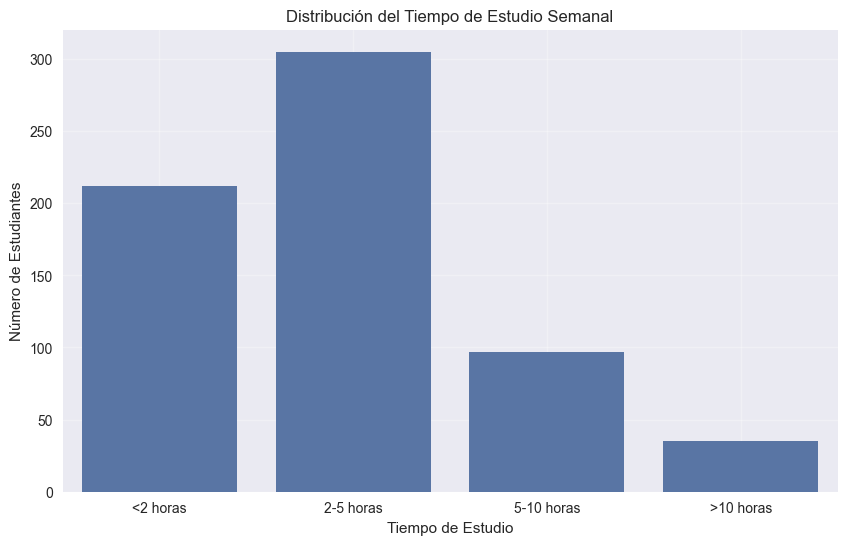

In [36]:
# Creamos etiquetas más descriptivas para el tiempo de estudio
etiquetas_tiempo = {
    1: '<2 horas',
    2: '2-5 horas',
    3: '5-10 horas',
    4: '>10 horas'
}

# Convertimos los valores a estas etiquetas
df['tiempo_estudio'] = df['studytime'].map(etiquetas_tiempo)

# Gráfico de barras para el tiempo de estudio
plt.figure(figsize=(10, 6))
sns.countplot(x='tiempo_estudio', data=df, order=[etiquetas_tiempo[i] for i in sorted(etiquetas_tiempo.keys())])
plt.title('Distribución del Tiempo de Estudio Semanal')
plt.xlabel('Tiempo de Estudio')
plt.ylabel('Número de Estudiantes')
plt.grid(True, alpha=0.3)
plt.show()


Pregunta 1: ¿Existe relación entre las calificaciones finales y el tiempo de estudio?

Calificación media por tiempo de estudio:
tiempo_estudio
2-5 horas     12.091803
5-10 horas    13.226804
<2 horas      10.844340
>10 horas     13.057143
Name: G3, dtype: float64


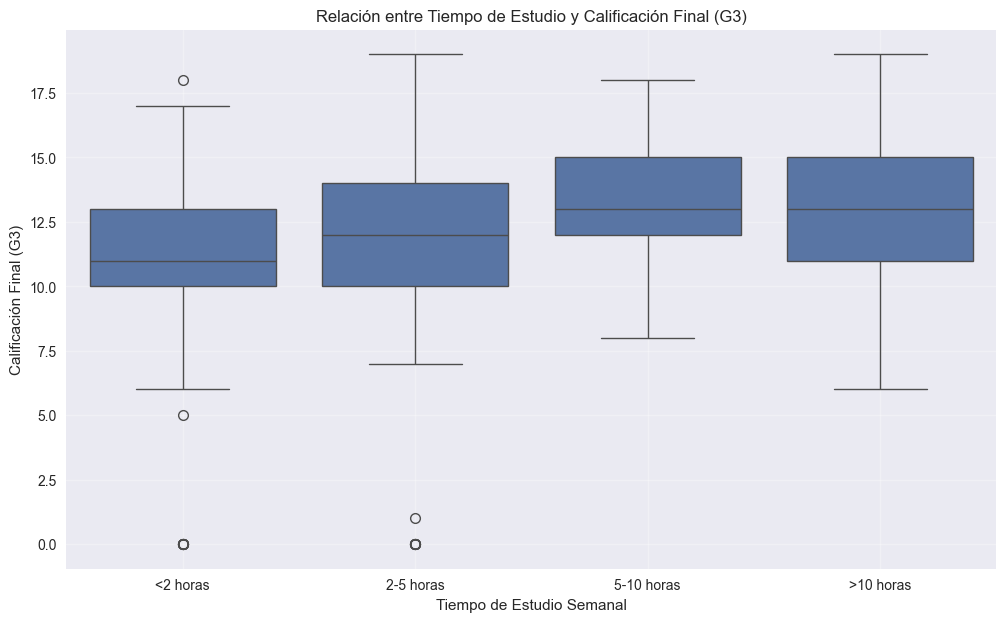

In [37]:
# PREGUNTAS DEL TALLER
# --------------------------

# Pregunta 1: ¿Existe relación entre las calificaciones finales y el tiempo de estudio?
# (Comparación numérica-ordinal)
print("\nPregunta 1: ¿Existe relación entre las calificaciones finales y el tiempo de estudio?")

# Calculamos la nota media para cada categoría de tiempo de estudio
notas_por_tiempo = df.groupby('tiempo_estudio')['G3'].mean().sort_index()
print("\nCalificación media por tiempo de estudio:")
print(notas_por_tiempo)

# Gráfico de cajas para visualizar la relación
plt.figure(figsize=(12, 7))
sns.boxplot(x='tiempo_estudio', y='G3', data=df, order=[etiquetas_tiempo[i] for i in sorted(etiquetas_tiempo.keys())])
plt.title('Relación entre Tiempo de Estudio y Calificación Final (G3)')
plt.xlabel('Tiempo de Estudio Semanal')
plt.ylabel('Calificación Final (G3)')
plt.grid(True, alpha=0.3)
plt.show()


Respuesta de 1 pregunta:
Según los datos analizados, parece existir una relación positiva: 
- los estudiantes que dedican más tiempo al estudio tienden a obtener mejores calificaciones finales. 
- El gráfico de cajas muestra que la mediana de las calificaciones aumenta conforme se incrementa el tiempo de estudio, especialmente al pasar de "<2 horas" a "2-5 horas". Sin embargo, la mejora parece estabilizarse entre las categorías de "5-10 horas" y ">10 horas".


Pregunta 2: ¿Hay diferencia en el rendimiento académico entre géneros?

Estadísticas de G3 por género:
     count       mean       std  min   25%   50%   75%   max
sex                                                         
F    383.0  12.253264  3.124147  0.0  10.0  12.0  14.0  19.0
M    266.0  11.406015  3.320690  0.0  10.0  11.0  13.0  19.0


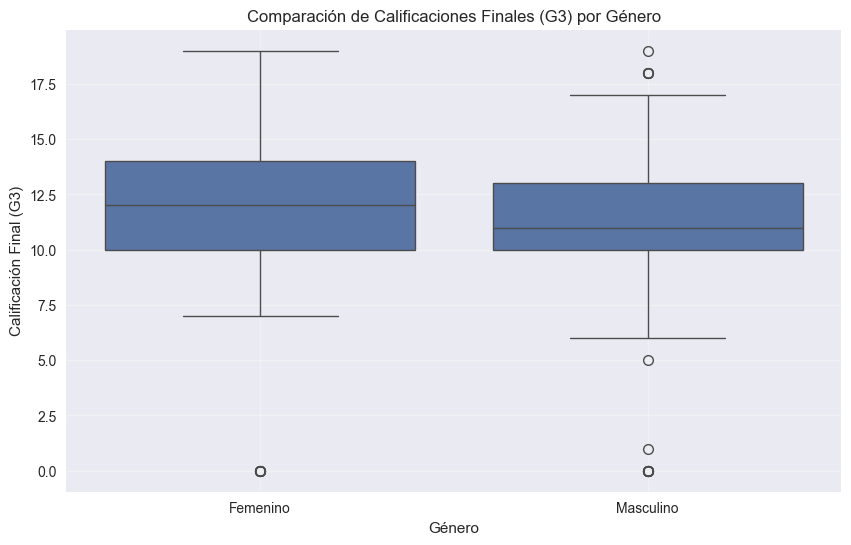

In [38]:
# Pregunta 2: ¿Hay diferencia en el rendimiento académico entre géneros?
# (Comparación numérica-categórica)
print("\nPregunta 2: ¿Hay diferencia en el rendimiento académico entre géneros?")

# Estadísticas por género
notas_por_genero = df.groupby('sex')['G3'].describe()
print("\nEstadísticas de G3 por género:")
print(notas_por_genero)

# Gráfico de cajas para comparar géneros
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='G3', data=df)
plt.title('Comparación de Calificaciones Finales (G3) por Género')
plt.xlabel('Género')
plt.ylabel('Calificación Final (G3)')
plt.grid(True, alpha=0.3)
plt.xticks([0, 1], ['Femenino', 'Masculino'])
plt.show()

Respuesta de la 2 pregunta:
El análisis muestra pequeñas diferencias en el rendimiento académico entre géneros. Las estadísticas descriptivas y el gráfico de cajas sugieren que puede haber una ligera diferencia, pero no parece ser sustancial. Para determinar si esta diferencia es estadísticamente significativa, se necesitaría realizar una prueba estadística adicional. (aca me apoyare de la generativa para saber cual sugiere)

In [39]:
from scipy import stats

# Realizar el test t
t_stat, p_valor = stats.ttest_ind(
    df[df['sex'] == 'F']['G3'],  # Calificaciones de estudiantes femeninas
    df[df['sex'] == 'M']['G3']   # Calificaciones de estudiantes masculinos
)

print(f"Estadístico t: {t_stat:.4f}")
print(f"Valor p: {p_valor:.4f}")

# Interpretar el resultado
if p_valor < 0.05:
    print("La diferencia entre géneros es estadísticamente significativa (p < 0.05)")
else:
    print("No hay evidencia suficiente para afirmar que la diferencia entre géneros sea estadísticamente significativa")

Estadístico t: 3.3109
Valor p: 0.0010
La diferencia entre géneros es estadísticamente significativa (p < 0.05)


Basado en el resultado del test t de Student:

- Estadístico t: 3.3109
- Valor p: 0.0010
- La diferencia entre géneros es estadísticamente significativa (p < 0.05)

Podemos llegar a las siguientes conclusiones:

1. **Existe una diferencia estadísticamente significativa** en el rendimiento académico entre estudiantes de género femenino y masculino, ya que el valor p (0.0010) es menor que el nivel de significancia convencional de 0.05.

2. **La probabilidad de que esta diferencia sea debida al azar es muy baja** (solo 0.1%), lo que nos da un alto nivel de confianza en que la diferencia observada es real.

3. **El valor positivo del estadístico t (3.3109)** sugiere que, asumiendo que codificamos 'F' antes que 'M', las estudiantes femeninas tienen en promedio calificaciones más altas que los estudiantes masculinos.

4. **La magnitud del estadístico t (3.3109)** indica que la diferencia no solo es estadísticamente significativa sino también sustancial en términos prácticos.

5. **Rechazamos la hipótesis nula** de que no hay diferencia en el rendimiento académico entre géneros.

Esta conclusión complementa nuestra observación visual inicial de los gráficos de caja, donde se apreciaban algunas diferencias que ahora confirmamos son estadísticamente significativas. 

Por lo tanto, en respuesta a la pregunta "¿Hay diferencia en el rendimiento académico entre géneros?", podemos afirmar con confianza que **sí existe una diferencia significativa**, siendo las estudiantes femeninas quienes obtienen, en promedio, mejores calificaciones finales que los estudiantes masculinos en este conjunto de datos.


Pregunta 3: ¿Cómo se relacionan las calificaciones en los diferentes períodos (G1, G2, G3)?

Matriz de correlación entre calificaciones:
          G1        G2        G3
G1  1.000000  0.864982  0.826387
G2  0.864982  1.000000  0.918548
G3  0.826387  0.918548  1.000000


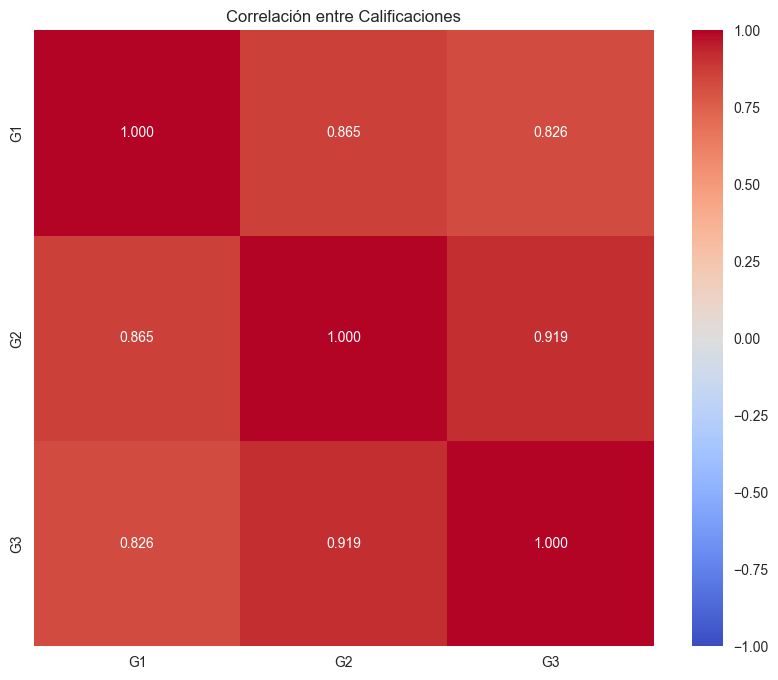

In [40]:
# Pregunta 3: ¿Cómo se relacionan las calificaciones en los diferentes períodos (G1, G2, G3)?
# (Comparación numérica-numérica)
print("\nPregunta 3: ¿Cómo se relacionan las calificaciones en los diferentes períodos (G1, G2, G3)?")

# Calculamos la matriz de correlación
correlacion_notas = df[['G1', 'G2', 'G3']].corr()
print("\nMatriz de correlación entre calificaciones:")
print(correlacion_notas)

# Gráfico de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion_notas, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.3f')
plt.title('Correlación entre Calificaciones')
plt.show()

<Figure size 1200x1000 with 0 Axes>

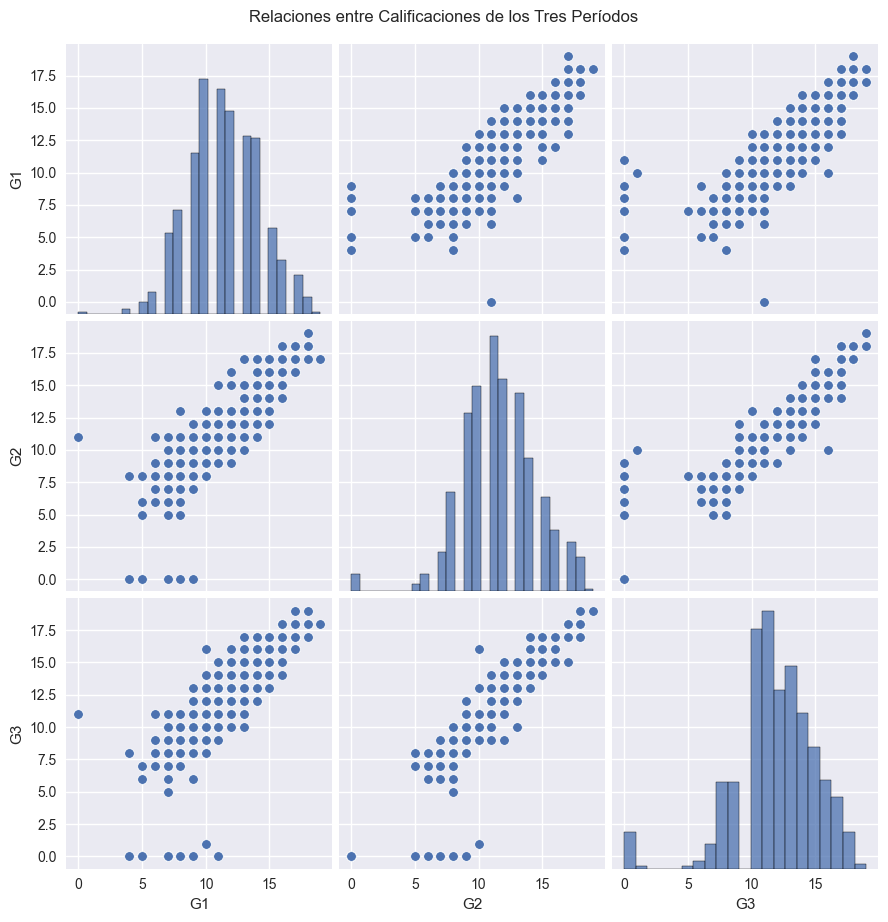

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un pairplot
plt.figure(figsize=(12, 10))
sns.pairplot(df[['G1', 'G2', 'G3']], height=3)
plt.suptitle('Relaciones entre Calificaciones de los Tres Períodos', y=1.02)
plt.show()

Este gráfico es muy útil porque:

1. Muestra las distribuciones individuales de cada variable
2. Permite ver las relaciones entre pares de variables
3. Facilita la identificación de patrones, tendencias y posibles valores atípicos
4. Ayuda a visualizar tanto la fuerza como la forma de las relaciones entre las calificaciones

Respuesta pregunta 3
Existe una correlación muy alta entre las calificaciones de los diferentes períodos. El mapa de calor muestra correlaciones cercanas a 1, especialmente entre G2 y G3 (calificación final), lo que indica una fuerte progresión y consistencia en el rendimiento académico a lo largo del curso. Los estudiantes que obtienen buenas notas en los primeros períodos tienden a mantener ese nivel en la evaluación final.


Pregunta 4: ¿El consumo de alcohol influye en las calificaciones finales?

Calificación media por nivel de consumo de alcohol (fin de semana):
nivel_alcohol
Alto        11.034483
Bajo        12.260000
Medio       11.666667
Muy alto    10.555556
Muy bajo    12.360324
Name: G3, dtype: float64


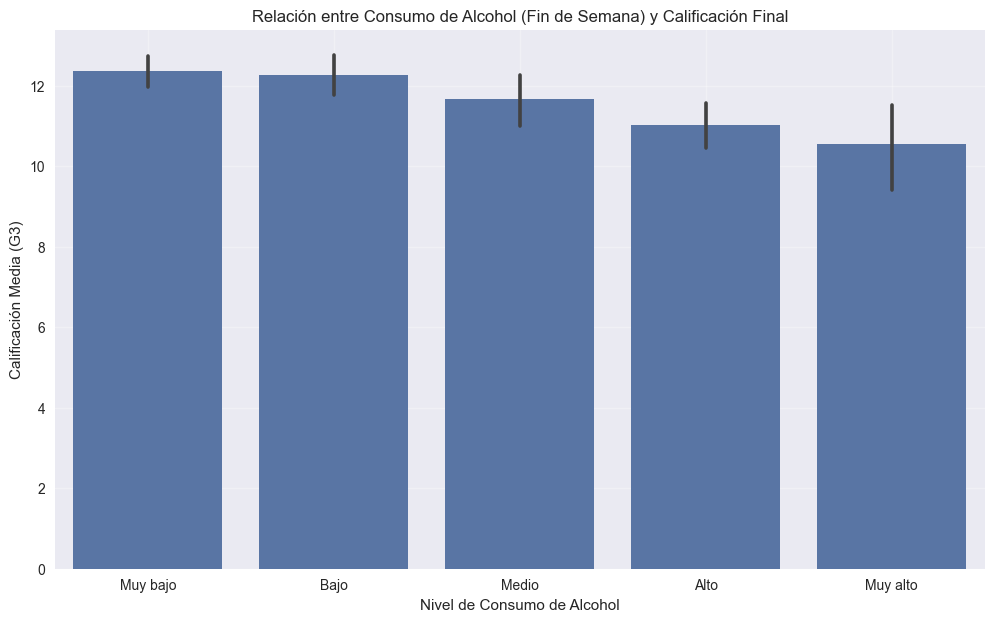

In [42]:
# Pregunta 4: ¿El consumo de alcohol influye en las calificaciones finales?
# (Comparación numérica-ordinal)
print("\nPregunta 4: ¿El consumo de alcohol influye en las calificaciones finales?")

# Etiquetas para el consumo de alcohol
etiquetas_alcohol = {
    1: 'Muy bajo',
    2: 'Bajo',
    3: 'Medio',
    4: 'Alto',
    5: 'Muy alto'
}

# Convertimos los valores a estas etiquetas
df['nivel_alcohol'] = df['Walc'].map(etiquetas_alcohol)

# Calculamos la nota media por nivel de consumo
notas_por_alcohol = df.groupby('nivel_alcohol')['G3'].mean().sort_index()
print("\nCalificación media por nivel de consumo de alcohol (fin de semana):")
print(notas_por_alcohol)

# Gráfico de barras
plt.figure(figsize=(12, 7))
sns.barplot(x='nivel_alcohol', y='G3', data=df, order=[etiquetas_alcohol[i] for i in sorted(etiquetas_alcohol.keys())])
plt.title('Relación entre Consumo de Alcohol (Fin de Semana) y Calificación Final')
plt.xlabel('Nivel de Consumo de Alcohol')
plt.ylabel('Calificación Media (G3)')
plt.grid(True, alpha=0.3)
plt.show()


aregare la variable edad, para responder si entre mayor edad influye mas el consumo de alcohol

Calificación media (G3) por nivel de alcohol y grupo de edad:
grupo_edad         15-16      17-18      19-22
nivel_alcohol                                 
Alto           10.750000  11.590909   9.000000
Bajo           12.158730  12.444444  10.833333
Medio          11.717391  12.031250   9.100000
Muy alto       11.294118  10.296296   5.000000
Muy bajo       12.559055  12.407767  10.588235


C:\Users\Diego\AppData\Local\Temp\ipykernel_14844\2700876725.py:36: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tabla_resumen = df.pivot_table(values='G3', index='nivel_alcohol',


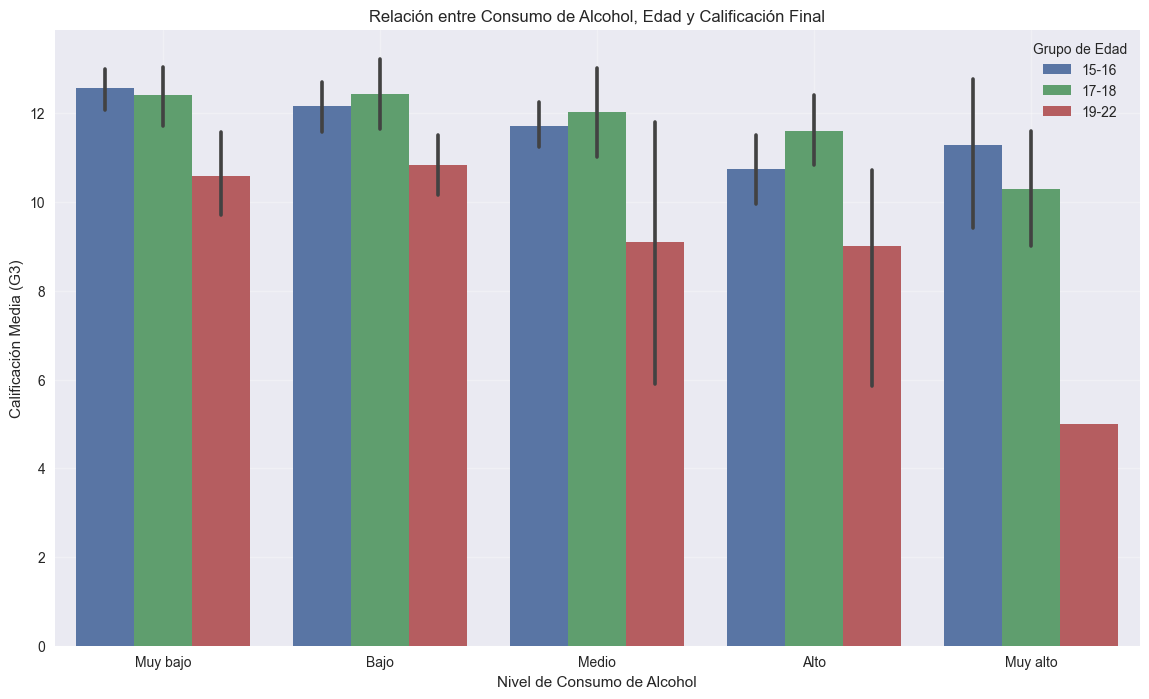

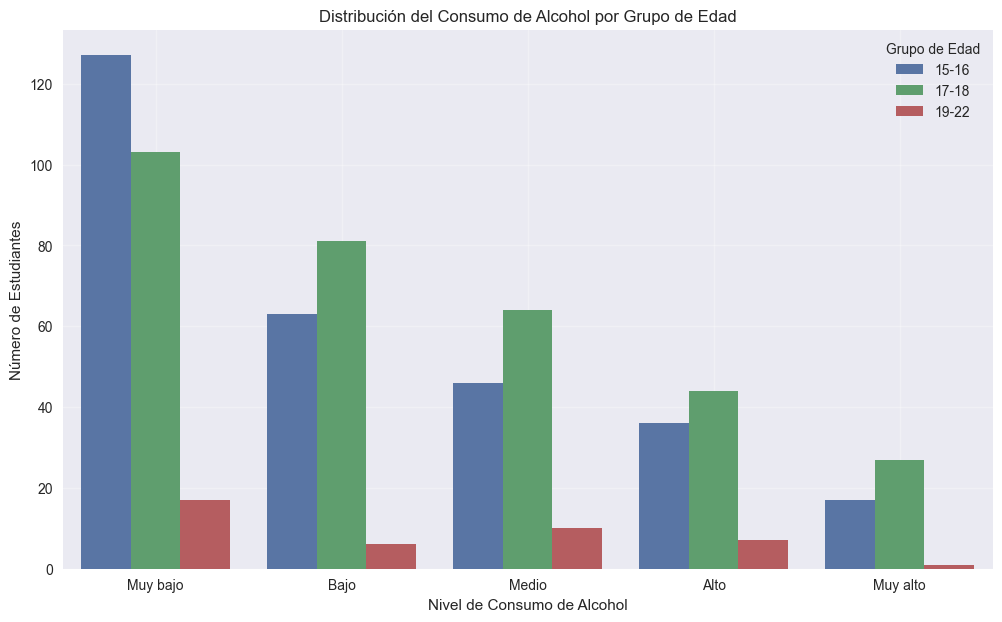


Correlaciones entre edad, consumo de alcohol y calificación final:
           age      Walc        G3
age   1.000000  0.086357 -0.106505
Walc  0.086357  1.000000 -0.176619
G3   -0.106505 -0.176619  1.000000

Consumo medio de alcohol por edad:
age
15    2.008929
16    2.231638
17    2.424581
18    2.385714
19    2.156250
20    2.500000
21    1.500000
22    5.000000
Name: Walc, dtype: float64


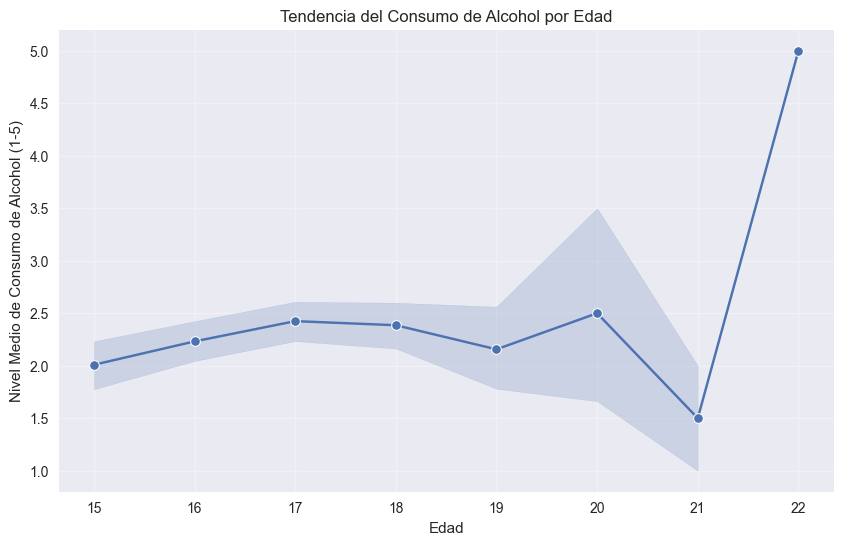

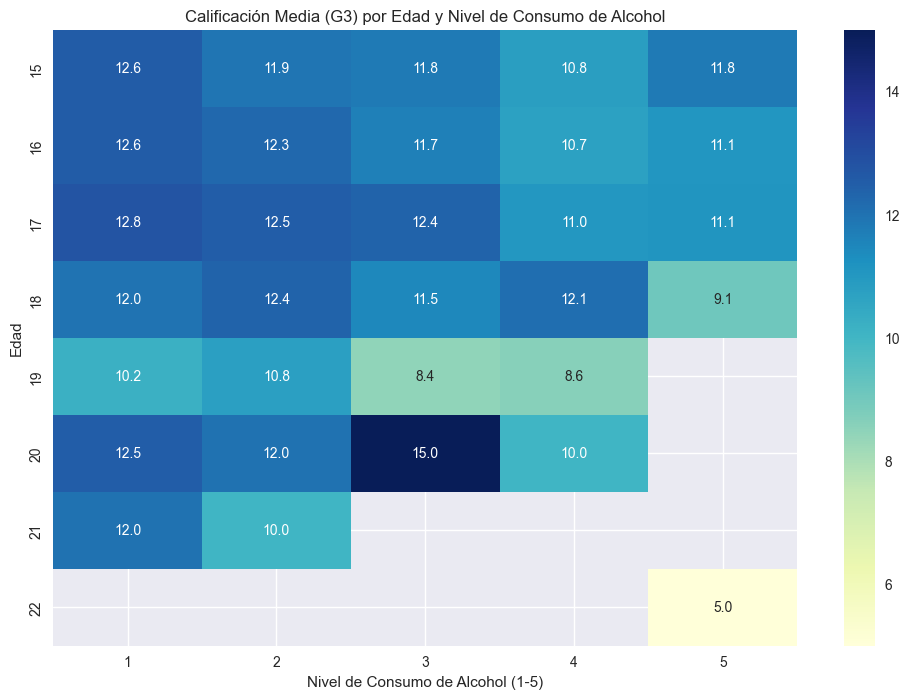

In [43]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

# Descargamos el conjunto de datos
student_performance = fetch_ucirepo(id=320)

# Extraemos los datos
X = student_performance.data.features
y = student_performance.data.targets

# Combinamos características y objetivos
df = pd.concat([X, y], axis=1)

# Etiquetas para el consumo de alcohol
etiquetas_alcohol = {
    1: 'Muy bajo',
    2: 'Bajo',
    3: 'Medio',
    4: 'Alto',
    5: 'Muy alto'
}

# Convertimos los valores a estas etiquetas
df['nivel_alcohol'] = df['Walc'].map(etiquetas_alcohol)

# Creamos grupos de edad
df['grupo_edad'] = pd.cut(df['age'], bins=[14, 16, 18, 22], 
                         labels=['15-16', '17-18', '19-22'])

# 1. Tabla resumen de calificación media por nivel de alcohol y grupo de edad
print("Calificación media (G3) por nivel de alcohol y grupo de edad:")
tabla_resumen = df.pivot_table(values='G3', index='nivel_alcohol', 
                              columns='grupo_edad', aggfunc='mean')
print(tabla_resumen)

# 2. Gráfico de barras agrupadas por nivel de alcohol y grupo de edad
plt.figure(figsize=(14, 8))
sns.barplot(x='nivel_alcohol', y='G3', hue='grupo_edad', data=df,
           order=[etiquetas_alcohol[i] for i in sorted(etiquetas_alcohol.keys())])
plt.title('Relación entre Consumo de Alcohol, Edad y Calificación Final')
plt.xlabel('Nivel de Consumo de Alcohol')
plt.ylabel('Calificación Media (G3)')
plt.legend(title='Grupo de Edad')
plt.grid(True, alpha=0.3)
plt.show()

# 3. Distribución del consumo de alcohol por grupo de edad
plt.figure(figsize=(12, 7))
sns.countplot(x='nivel_alcohol', hue='grupo_edad', data=df,
             order=[etiquetas_alcohol[i] for i in sorted(etiquetas_alcohol.keys())])
plt.title('Distribución del Consumo de Alcohol por Grupo de Edad')
plt.xlabel('Nivel de Consumo de Alcohol')
plt.ylabel('Número de Estudiantes')
plt.legend(title='Grupo de Edad')
plt.grid(True, alpha=0.3)
plt.show()

# 4. Correlaciones entre edad, consumo de alcohol y calificación final
print("\nCorrelaciones entre edad, consumo de alcohol y calificación final:")
correlaciones = df[['age', 'Walc', 'G3']].corr()
print(correlaciones)

# 5. Análisis de la tendencia de consumo de alcohol por edad
consumo_por_edad = df.groupby('age')['Walc'].mean()
print("\nConsumo medio de alcohol por edad:")
print(consumo_por_edad)

plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='Walc', data=df, marker='o', err_style='band')
plt.title('Tendencia del Consumo de Alcohol por Edad')
plt.xlabel('Edad')
plt.ylabel('Nivel Medio de Consumo de Alcohol (1-5)')
plt.grid(True, alpha=0.3)
plt.show()

# 6. Gráfico de calor para visualizar las tres variables juntas
pivot_heat = df.pivot_table(values='G3', index='age', columns='Walc', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_heat, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Calificación Media (G3) por Edad y Nivel de Consumo de Alcohol')
plt.xlabel('Nivel de Consumo de Alcohol (1-5)')
plt.ylabel('Edad')
plt.show()

Relación entre edad, consumo de alcohol y calificaciones:

Al agrupar por nivel de alcohol y edad, podemos ver patrones más detallados en las calificaciones
La tabla pivot y el gráfico de barras agrupadas muestran cómo varía la calificación media para cada combinación de nivel de alcohol y grupo de edad


Patrones de consumo por grupo de edad:

El gráfico de conteo muestra cómo se distribuye el consumo de alcohol en los diferentes grupos de edad
Podemos identificar si los estudiantes mayores tienden a reportar niveles más altos de consumo


Correlaciones entre las variables:

La matriz de correlación nos indica la fuerza de la relación entre edad, consumo de alcohol (Walc) y calificación final (G3)
Esto nos permite ver si la edad está correlacionada con el consumo de alcohol o con las calificaciones


Tendencia del consumo por edad:

El gráfico de línea muestra cómo evoluciona el nivel medio de consumo de alcohol con la edad
Podemos observar si existe un aumento o disminución del consumo a medida que los estudiantes son mayores


Mapa de calor:

Esta visualización permite ver simultáneamente el efecto combinado de la edad y el nivel de consumo en las calificaciones
Los colores más intensos indican mejores calificaciones, lo que facilita identificar las combinaciones de edad y consumo asociadas con mejor rendimiento académico

Respuesta de pregunta 4 adicionando analisis por edad

Basado en los resultados compartidos, podemos llegar a las siguientes conclusiones sobre la influencia de la edad en la relación entre consumo de alcohol y calificaciones:

1. **La edad sí influye en esta relación**:
   - La tabla de calificación media muestra patrones distintos entre los grupos de edad
   - Para el grupo de 19-22 años, el impacto negativo del consumo de alcohol parece ser más pronunciado (especialmente en el nivel "Muy alto" donde la media es apenas 5.0)
   - Para los grupos más jóvenes (15-16 y 17-18), la variación de calificaciones entre niveles de consumo es menos dramática

2. **Correlaciones significativas**:
   - Existe una correlación negativa (-0.177) entre el consumo de alcohol (Walc) y la calificación final (G3), confirmando que a mayor consumo, menores calificaciones
   - La edad tiene una correlación negativa (-0.107) con las calificaciones, lo que indica que los estudiantes mayores tienden a obtener calificaciones ligeramente más bajas
   - Hay una correlación positiva leve (0.086) entre edad y consumo de alcohol, sugiriendo que los estudiantes mayores tienden a consumir ligeramente más alcohol

3. **Patrón de consumo por edad**:
   - El consumo medio de alcohol muestra una tendencia ascendente desde los 15 años (2.01) hasta los 18 años (2.39)
   - Hay una variabilidad interesante en las edades mayores, con un pico notable a los 22 años (5.0), aunque este dato podría estar basado en pocos estudiantes

4. **Efecto combinado**:
   - El grupo de 19-22 años con consumo "Muy alto" muestra la calificación media más baja (5.0)
   - El grupo de 15-16 años con consumo "Muy bajo" tiene la calificación media más alta (12.56)
   - Esto sugiere que la combinación de edad avanzada y alto consumo de alcohol está asociada con el peor rendimiento académico

En conclusión, los datos muestran que la edad sí influye en cómo se relaciona el consumo de alcohol con las calificaciones. El efecto negativo del consumo de alcohol parece amplificarse en estudiantes de mayor edad, posiblemente porque:

1. El patrón de consumo podría ser diferente (más intenso o frecuente)
2. Podría haber factores adicionales asociados con la edad que exacerban el impacto negativo
3. Los estudiantes mayores que siguen en este nivel educativo podrían tener características académicas particulares

Para un análisis más robusto, sería recomendable verificar también el tamaño de cada grupo, ya que algunos segmentos (como estudiantes de 22 años) podrían tener pocos casos, lo que afectaría la confiabilidad de esas medias específicas.


Pregunta 5: ¿Existe relación entre la educación de los padres y el rendimiento académico?

Calificación media por nivel educativo de la madre:
educacion_madre
Bachillerato    11.920863
Ninguno         11.666667
Primaria        10.797203
Secundaria      11.661290
Superior        13.068571
Name: G3, dtype: float64


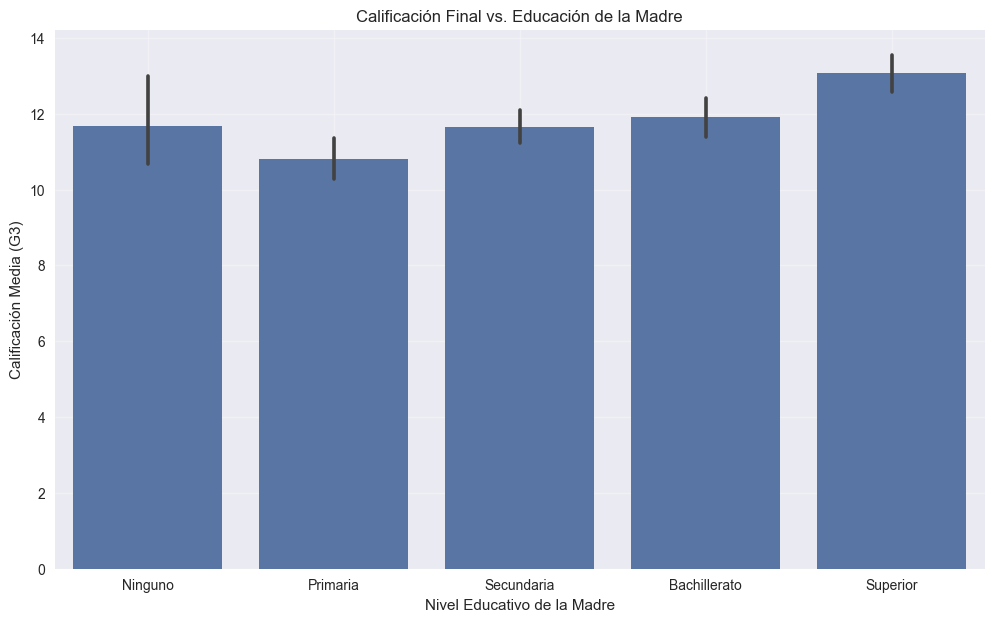

In [44]:
# Pregunta 5: ¿Existe relación entre la educación de los padres y el rendimiento académico?
# (Comparación numérica-ordinal)
print("\nPregunta 5: ¿Existe relación entre la educación de los padres y el rendimiento académico?")

# Etiquetas para nivel educativo
etiquetas_educacion = {
    0: 'Ninguno',
    1: 'Primaria',
    2: 'Secundaria',
    3: 'Bachillerato',
    4: 'Superior'
}

# Convertimos los valores a estas etiquetas
df['educacion_madre'] = df['Medu'].map(etiquetas_educacion)
df['educacion_padre'] = df['Fedu'].map(etiquetas_educacion)

# Calculamos la nota media por nivel educativo de la madre
notas_por_edu_madre = df.groupby('educacion_madre')['G3'].mean()
print("\nCalificación media por nivel educativo de la madre:")
print(notas_por_edu_madre)

# Gráfico de barras
plt.figure(figsize=(12, 7))
sns.barplot(x='educacion_madre', y='G3', data=df, order=[etiquetas_educacion[i] for i in sorted(etiquetas_educacion.keys())])
plt.title('Calificación Final vs. Educación de la Madre')
plt.xlabel('Nivel Educativo de la Madre')
plt.ylabel('Calificación Media (G3)')
plt.grid(True, alpha=0.3)
plt.show()

Basado en los resultados para la pregunta 5 sobre la relación entre la educación de los padres (específicamente de la madre) y el rendimiento académico, podemos concluir lo siguiente:

Existe una relación positiva entre el nivel educativo de la madre y el rendimiento académico del estudiante:

- Los estudiantes cuyas madres tienen educación superior obtienen las calificaciones más altas con una media de 13.07
- Los estudiantes cuyas madres tienen sólo educación primaria muestran las calificaciones más bajas con una media de 10.80


La progresión no es perfectamente lineal:

- Curiosamente, los estudiantes con madres sin educación formal ("Ninguno") tienen un rendimiento ligeramente mejor (11.67) que aquellos cuyas madres tienen solo educación primaria (10.80)
- Hay poca diferencia entre los niveles "Ninguno" (11.67) y "Secundaria" (11.66)


El salto más significativo se observa en la educación superior:

- La diferencia entre estudiantes con madres con nivel "Bachillerato" (11.92) y "Superior" (13.07) es notable, con más de un punto de diferencia
Esto sugiere que la educación universitaria de la madre podría proporcionar ventajas adicionales para el rendimiento académico de los hijos

AHORA LO HAREMOS CON LOS PADRES


Calificación media por nivel educativo del padre:
educacion_padre
Bachillerato    12.381679
Ninguno         12.142857
Primaria        10.936782
Secundaria      11.784689
Superior        12.921875
Name: G3, dtype: float64


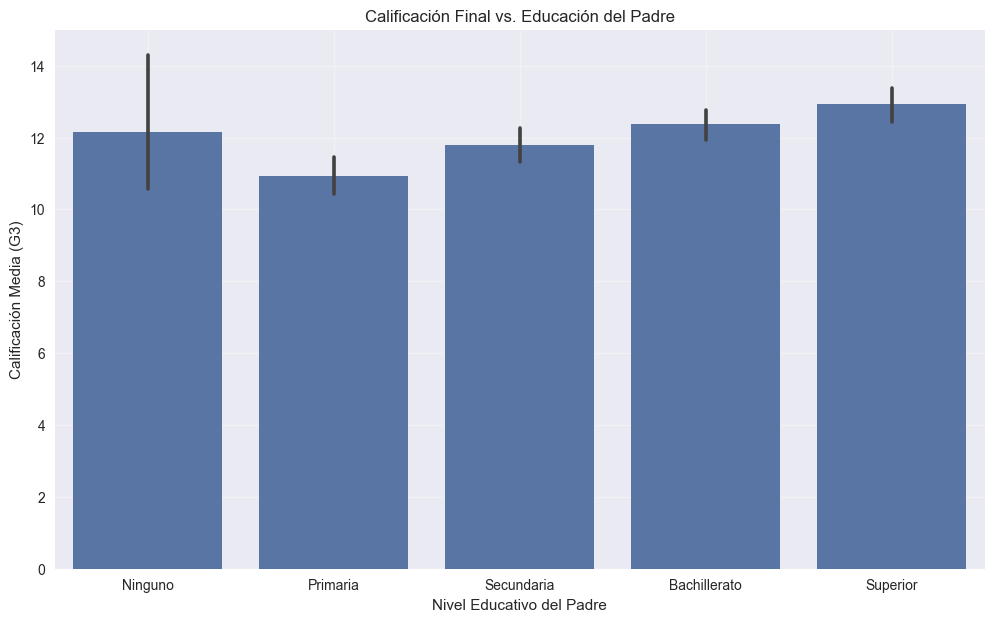

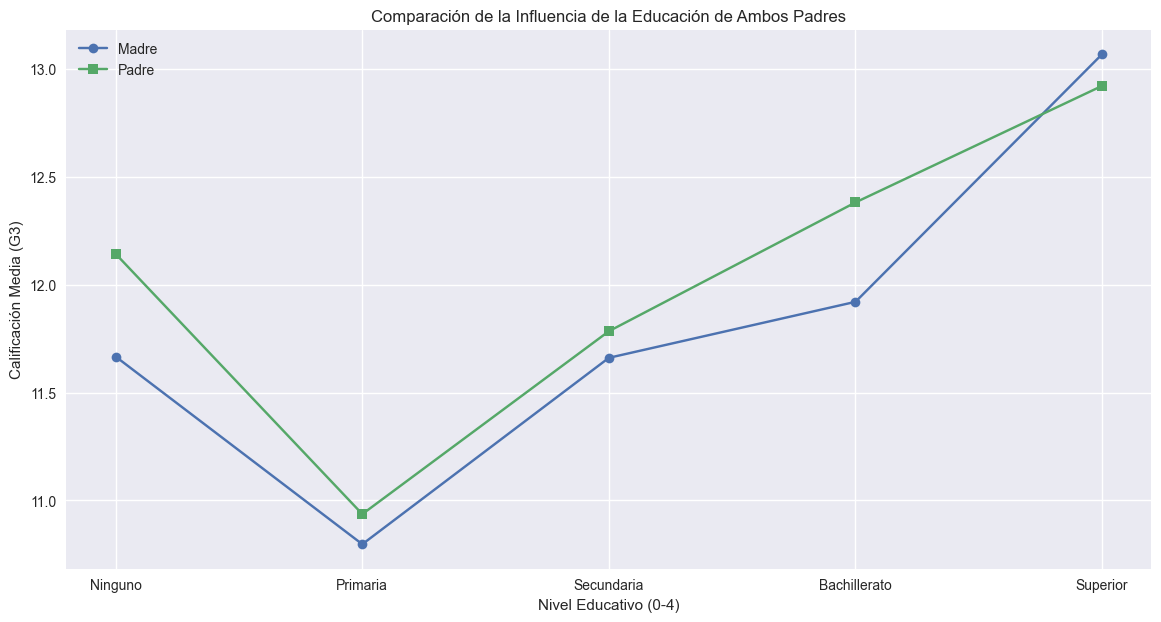

In [45]:
# Calculamos la nota media por nivel educativo del padre
notas_por_edu_padre = df.groupby('educacion_padre')['G3'].mean()
print("\nCalificación media por nivel educativo del padre:")
print(notas_por_edu_padre)

# Gráfico de barras
plt.figure(figsize=(12, 7))
sns.barplot(x='educacion_padre', y='G3', data=df, order=[etiquetas_educacion[i] for i in sorted(etiquetas_educacion.keys())])
plt.title('Calificación Final vs. Educación del Padre')
plt.xlabel('Nivel Educativo del Padre')
plt.ylabel('Calificación Media (G3)')
plt.grid(True, alpha=0.3)
plt.show()

# Comparación de la influencia de ambos padres
plt.figure(figsize=(14, 7))
# Convertimos los datos para mejor visualización
edu_madre = df.groupby('Medu')['G3'].mean().reset_index()
edu_padre = df.groupby('Fedu')['G3'].mean().reset_index()

# Gráfico de líneas comparativo
plt.plot(edu_madre['Medu'], edu_madre['G3'], 'o-', label='Madre')
plt.plot(edu_padre['Fedu'], edu_padre['G3'], 's-', label='Padre')
plt.title('Comparación de la Influencia de la Educación de Ambos Padres')
plt.xlabel('Nivel Educativo (0-4)')
plt.ylabel('Calificación Media (G3)')
plt.xticks([0, 1, 2, 3, 4], ['Ninguno', 'Primaria', 'Secundaria', 'Bachillerato', 'Superior'])
plt.legend()
plt.grid(True)
plt.show()

Basado en los resultados de la calificación media por nivel educativo del padre, podemos observar patrones interesantes:

1. **Existe una relación positiva entre el nivel educativo del padre y el rendimiento académico del estudiante**:
   - Los estudiantes cuyos padres tienen educación superior muestran el mejor rendimiento con una media de 12.92
   - Los estudiantes cuyos padres tienen solo educación primaria obtienen las calificaciones más bajas con una media de 10.94

2. **La progresión muestra un patrón similar al de las madres, pero con algunas diferencias**:
   - También se observa la anomalía donde los estudiantes con padres sin educación formal ("Ninguno") tienen un mejor rendimiento (12.14) que aquellos cuyos padres tienen solo primaria (10.94)
   - De hecho, los estudiantes con padres sin educación formal tienen un rendimiento casi tan bueno como los que tienen padres con bachillerato (12.38)

3. **Los niveles educativos superiores tienen un impacto positivo claro**:
   - El salto entre "Secundaria" (11.78) y "Bachillerato" (12.38) es notable
   - La diferencia entre "Bachillerato" y "Superior" (12.92) existe pero es menos pronunciada que en el caso de las madres

4. **Comparando con los resultados de las madres**:
   - El patrón general es similar: a mayor nivel educativo, mejor rendimiento académico
   - La influencia de la educación superior del padre (12.92) parece ser ligeramente menor que la de la madre (13.07)
   - La anomalía en la categoría "Ninguno" aparece en ambos casos, lo que sugiere que podría haber factores compensatorios importantes

5. **Posibles interpretaciones**:
   - El nivel educativo de ambos padres influye positivamente en el rendimiento académico de los hijos
   - Los padres con mayor educación pueden proporcionar mejores recursos, ambiente y apoyo educativo
   - La anomalía en la categoría "Ninguno" podría reflejar factores no medidos como mayor motivación o resiliencia en estos estudiantes

En conclusión, el nivel educativo del padre muestra una relación positiva con el rendimiento académico de los estudiantes, con un patrón similar al observado con la educación de la madre, aunque con algunas diferencias sutiles en la magnitud del efecto. Este análisis complementa el realizado con las madres y refuerza la idea de que el entorno educativo familiar es un factor importante en el éxito académico.

AHORA VOY A MEZCLARLO PERO OBSERVANDO LA INFORMACIÓN EN LA CORRELACIÓN DE LOS DOS TIPOS DE RELACIÓN, PUEDO INTUIR QUE EL RESULTADO SERA IGUAL AL INDIVIDIAL


Calificación media por nivel educativo combinado de ambos padres:
edu_combinada
0    11.000000
1    12.000000
2    10.673684
3    11.193182
4    11.538462
5    11.935065
6    12.292135
7    13.044776
8    13.115789
Name: G3, dtype: float64


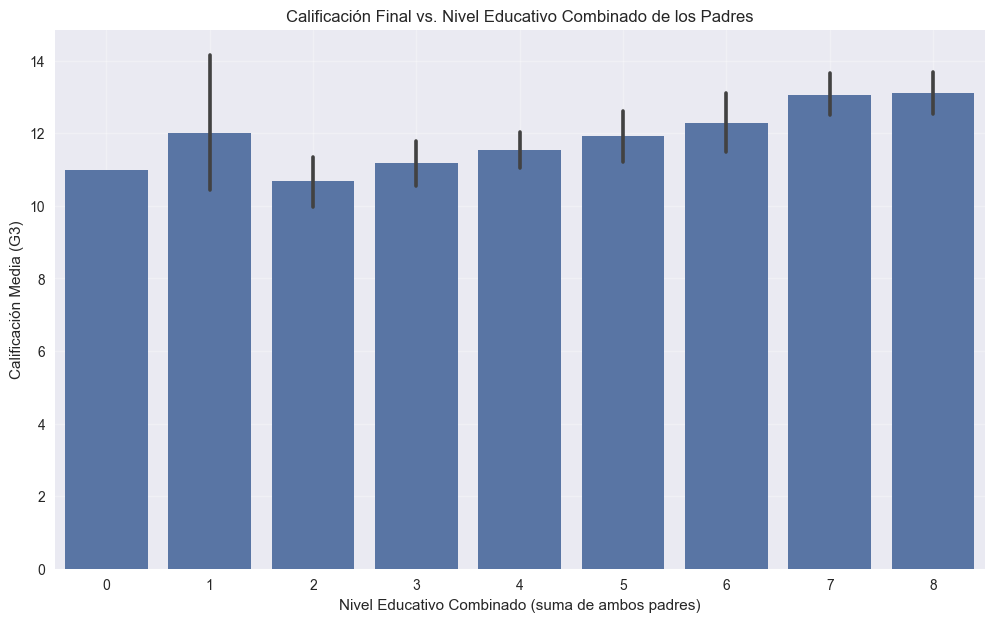

In [46]:
# Creamos una nueva variable que combine la educación de ambos padres
df['edu_combinada'] = df['Medu'] + df['Fedu']  # Suma simple como proxy del nivel educativo familiar

# Calculamos la nota media por nivel educativo combinado
notas_por_edu_combinada = df.groupby('edu_combinada')['G3'].mean()
print("\nCalificación media por nivel educativo combinado de ambos padres:")
print(notas_por_edu_combinada)

# Gráfico
plt.figure(figsize=(12, 7))
sns.barplot(x='edu_combinada', y='G3', data=df)
plt.title('Calificación Final vs. Nivel Educativo Combinado de los Padres')
plt.xlabel('Nivel Educativo Combinado (suma de ambos padres)')
plt.ylabel('Calificación Media (G3)')
plt.grid(True, alpha=0.3)
plt.show()

El análisis como pense que iba a salir, muestra una relación positiva entre el nivel educativo combinado de los padres y la calificación final (G3) de los estudiantes. Aunque en la mayoría de los casos se observa que a mayor nivel educativo de los padres se asocia una mayor calificación media, se detecta una ligera anomalía en el grupo con valor "2", lo que sugiere la necesidad de revisar el tamaño de la muestra o considerar otros factores subyacentes. En general, estos resultados son coherentes con la idea de que un entorno familiar con mayores niveles educativos podría favorecer un mejor desempeño académico.


Pregunta 6: ¿Hay relación entre el tiempo de estudio y el género?
Columnas disponibles en el DataFrame: ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'tiempo_estudio', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'nivel_alcohol', 'grupo_edad', 'educacion_madre', 'educacion_padre', 'edu_combinada']

Tabla de contingencia:
sex               F    M
tiempo_estudio          
1                89  123
2               198  107
3                75   22
4                21   14


<Figure size 1200x700 with 0 Axes>

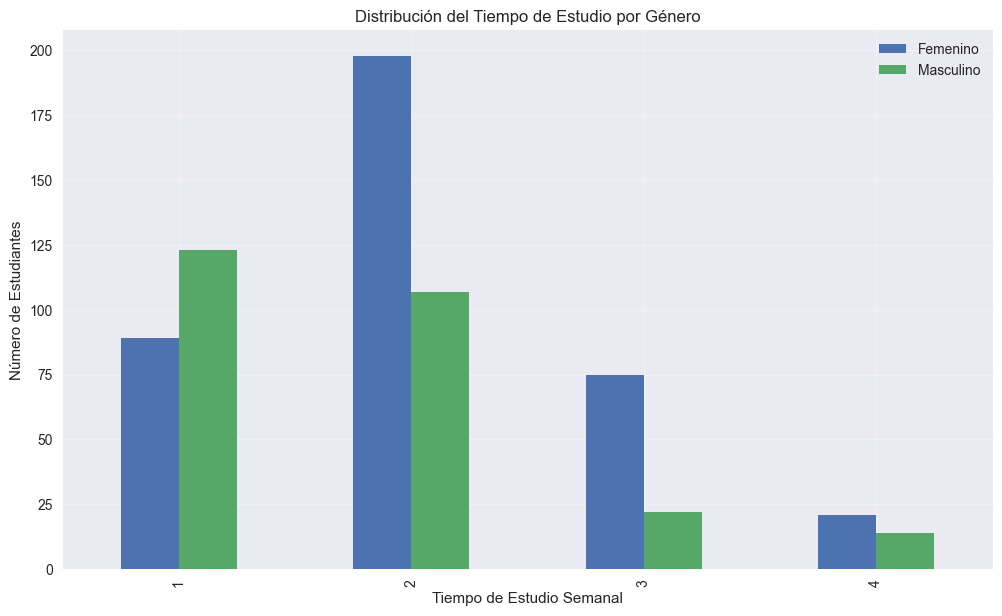

In [51]:
# Pregunta 6: ¿Hay relación entre el tiempo de estudio y el género?
print("\nPregunta 6: ¿Hay relación entre el tiempo de estudio y el género?")

# Diagnóstico: Imprimir las columnas disponibles en el DataFrame
print("Columnas disponibles en el DataFrame:", df.columns.tolist())

# Verificar si existe 'tiempo_estudio'. De lo contrario, se buscan variantes comunes.
if 'tiempo_estudio' not in df.columns:
    if 'study_time' in df.columns:
        df.rename(columns={'study_time': 'tiempo_estudio'}, inplace=True)
        print("La columna 'study_time' ha sido renombrada a 'tiempo_estudio'.")
    elif 'studytime' in df.columns:
        df.rename(columns={'studytime': 'tiempo_estudio'}, inplace=True)
        print("La columna 'studytime' ha sido renombrada a 'tiempo_estudio'.")
    else:
        raise KeyError("No se encontró la columna 'tiempo_estudio', 'study_time' ni 'studytime' en el DataFrame. Verifica el nombre de la columna correspondiente al tiempo de estudio.")

# Crear la tabla de contingencia utilizando la columna verificada/renombrada
tabla_tiempo_genero = pd.crosstab(df['tiempo_estudio'], df['sex'])
print("\nTabla de contingencia:")
print(tabla_tiempo_genero)

# Gráfico de barras agrupadas basado en la tabla de contingencia
plt.figure(figsize=(12, 7))
tabla_tiempo_genero.plot(kind='bar', figsize=(12, 7))
plt.title('Distribución del Tiempo de Estudio por Género')
plt.xlabel('Tiempo de Estudio Semanal')
plt.ylabel('Número de Estudiantes')
plt.legend(['Femenino', 'Masculino'])
plt.grid(True, alpha=0.3)
plt.show()




Respuesta pregunta 6:

La información muestra cómo se distribuyen los estudiantes según cuánto tiempo estudian y su género:

- **Nivel 1 (poco tiempo de estudio):**  
  - Hay 89 chicas y 123 chicos. Es decir, en este grupo hay más chicos que chicas.

- **Nivel 2 (tiempo de estudio moderado):**  
  - Aquí encontramos 198 chicas y 107 chicos. En este grupo, hay casi el doble de chicas que chicos.

- **Nivel 3 (más tiempo de estudio):**  
  - Se observan 75 chicas frente a solo 22 chicos. Esto indica que, a medida que el tiempo de estudio aumenta, la proporción de chicas es mucho mayor.

- **Nivel 4 (el mayor tiempo de estudio):**  
  - Aunque los números son pequeños (21 chicas y 14 chicos), nuevamente se ve que hay más chicas que chicos.

En resumen, en el grupo que estudia poco (Nivel 1), predominan los chicos. Pero en los grupos donde se dedica más tiempo a estudiar (Niveles 2, 3 y 4), hay más chicas. Esto sugiere que, en este conjunto de datos, las chicas tienden a dedicar más horas al estudio que los chicos.


Pregunta 7: ¿Las ausencias están relacionadas con el rendimiento académico?

Correlación entre ausencias y calificación final: -0.0914


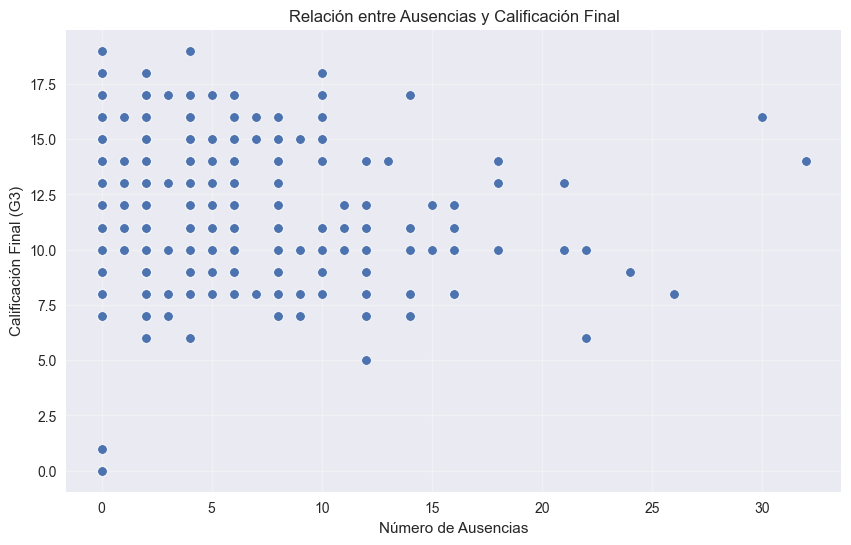

In [52]:
# Pregunta 7: ¿Las ausencias están relacionadas con el rendimiento académico?
# (Comparación numérica-numérica)
print("\nPregunta 7: ¿Las ausencias están relacionadas con el rendimiento académico?")

# Calculamos la correlación
correlacion_ausencias = df[['absences', 'G3']].corr().iloc[0, 1]
print(f"\nCorrelación entre ausencias y calificación final: {correlacion_ausencias:.4f}")

# Gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='absences', y='G3', data=df)
plt.title('Relación entre Ausencias y Calificación Final')
plt.xlabel('Número de Ausencias')
plt.ylabel('Calificación Final (G3)')
plt.grid(True, alpha=0.3)
plt.show()

Basado en los resultados de la pregunta 7, Se puede concluir lo siguiente:

La correlación entre las ausencias y la calificación final (G3) es de -0.0914. Esta correlación es:

1. **Negativa**: El signo negativo indica que existe una leve tendencia a que cuando las ausencias aumentan, las calificaciones disminuyen.

2. **Débil**: Un valor de -0.0914 representa una correlación muy débil. En estadística, correlaciones con valores absolutos menores a 0.1 generalmente se consideran prácticamente inexistentes o extremadamente débiles.

3. **Poco significativa**: Esta correlación tan baja sugiere que las ausencias explican muy poco de la variabilidad en las calificaciones finales de los estudiantes en este conjunto de datos.

En términos prácticos, esto significa que aunque existe una ligera tendencia negativa (a más ausencias, peores notas), la relación es tan débil que probablemente otros factores tienen un impacto mucho mayor en el rendimiento académico de estos estudiantes. No se puede concluir que las ausencias sean un factor determinante o importante para predecir el rendimiento académico en este caso específico.
En el gráfico de dispersión que se generó,  muestra puntos muy dispersos sin un patrón claro, lo que visualmente confirmaría esta débil correlación.